# EARTHQUAKE DATA ANALYSIS

**Introduction**

Welcome to the Earthquake Data Analysis project! This notebook provides a comprehensive analysis of earthquake data from various regions around the world. By leveraging data science techniques and tools, we aim to uncover patterns, trends, and key insights into seismic activities.

Earthquakes are natural phenomena that can cause significant damage and loss of life. Understanding the characteristics and impacts of earthquakes is crucial for improving disaster preparedness and mitigation strategies. In this notebook, we will explore a dataset containing detailed information about earthquakes, including their magnitude, location, depth, and the potential for tsunamis.

**Objectives**

1. Analyze the distribution and frequency of earthquake magnitudes.
2. Examine the geographic distribution of earthquakes.
3. Investigate the relationship between earthquake magnitude and depth.
4. Identify regions with higher seismic activity.
5. Provide data-driven insights to aid in disaster preparedness and research.

**Tools Used**

1. Python: A powerful programming language for data analysis and visualization.
2. Pandas: A library for data manipulation and analysis.
3. Matplotlib: A plotting library for creating static, interactive, and animated visualizations.
4. Seaborn: A data visualization library based on Matplotlib that provides a high-level interface for drawing attractive and informative statistical graphics.

**Load the Data**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

In [2]:
df = pd.read_csv('earthquake.csv')
df['date_time'] = pd.to_datetime(df['date_time'])
df.head()

C:\Users\HP\AppData\Local\Temp\ipykernel_15964\1795970559.py:2: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['date_time'] = pd.to_datetime(df['date_time'])


,title,magnitude,date_time,cdi,mmi,alert,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude,location,continent,country
0,"M 6.5 - 42 km W of Sola, Vanuatu",6.5,2023-08-16 12:47:00,7,4,green,0,657,us,114,7.177000,25.0,mww,192.955,-13.8814,167.1580,"Sola, Vanuatu",NaN,Vanuatu
1,"M 6.5 - 43 km S of Intipucá, El Salvador",6.5,2023-07-19 00:22:00,8,6,yellow,0,775,us,92,0.679000,40.0,mww,69.727,12.8140,-88.1265,"Intipucá, El Salvador",NaN,NaN
2,"M 6.6 - 25 km ESE of Loncopué, Argentina",6.6,2023-07-17 03:05:00,7,5,green,0,899,us,70,1.634000,28.0,mww,171.371,-38.1911,-70.3731,"Loncopué, Argentina",South America,Argentina
3,"M 7.2 - 98 km S of Sand Point, Alaska",7.2,2023-07-16 06:48:00,6,6,green,1,860,us,173,0.907000,36.0,mww,32.571,54.3844,-160.6990,"Sand Point, Alaska",NaN,NaN
4,M 7.3 - Alaska Peninsula,7.3,2023-07-16 06:48:00,0,5,NaN,1,820,at,79,0.879451,172.8,Mi,21.000,54.4900,-160.7960,Alaska Peninsula,NaN,NaN


**Exploratory Data Analysis**

In [3]:
# Display basic statistics
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Display the first few rows of the DataFrame
print(df.head())


         magnitude                   date_time          cdi         mmi  \
count  1000.000000                        1000  1000.000000  1000.00000   
mean      6.940150  2010-06-19 03:02:36.720000     3.605000     6.02700   
min       6.500000         1995-05-05 03:53:00     0.000000     1.00000   
25%       6.600000         2003-08-17 04:18:15     0.000000     5.00000   
50%       6.800000         2011-06-29 20:26:30     4.000000     6.00000   
75%       7.100000         2017-02-22 08:58:45     7.000000     7.00000   
max       9.100000         2023-08-16 12:47:00     9.000000    10.00000   
std       0.438148                         NaN     3.328972     1.43399   

           tsunami          sig          nst         dmin          gap  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean      0.325000   847.915000   193.918000     1.125174    20.926290   
min       0.000000   650.000000     0.000000     0.000000     0.000000   
25%       0.000000   691.000

**Visualization**

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


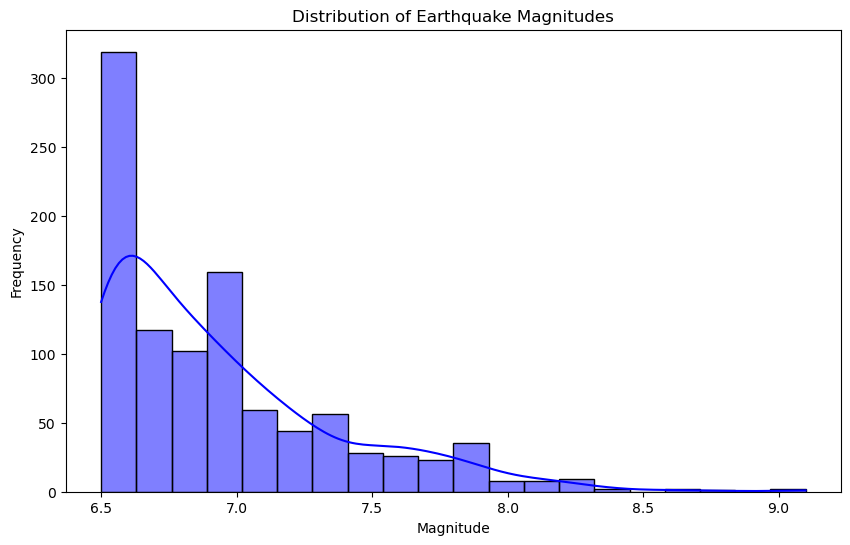

In [13]:

# Plot the distribution of earthquake magnitudes
plt.figure(figsize=(10, 6))
sns.histplot(df['magnitude'], bins=20, kde=True, color='blue')
plt.title('Distribution of Earthquake Magnitudes')
plt.xlabel('Magnitude')
plt.ylabel('Frequency')
plt.show()


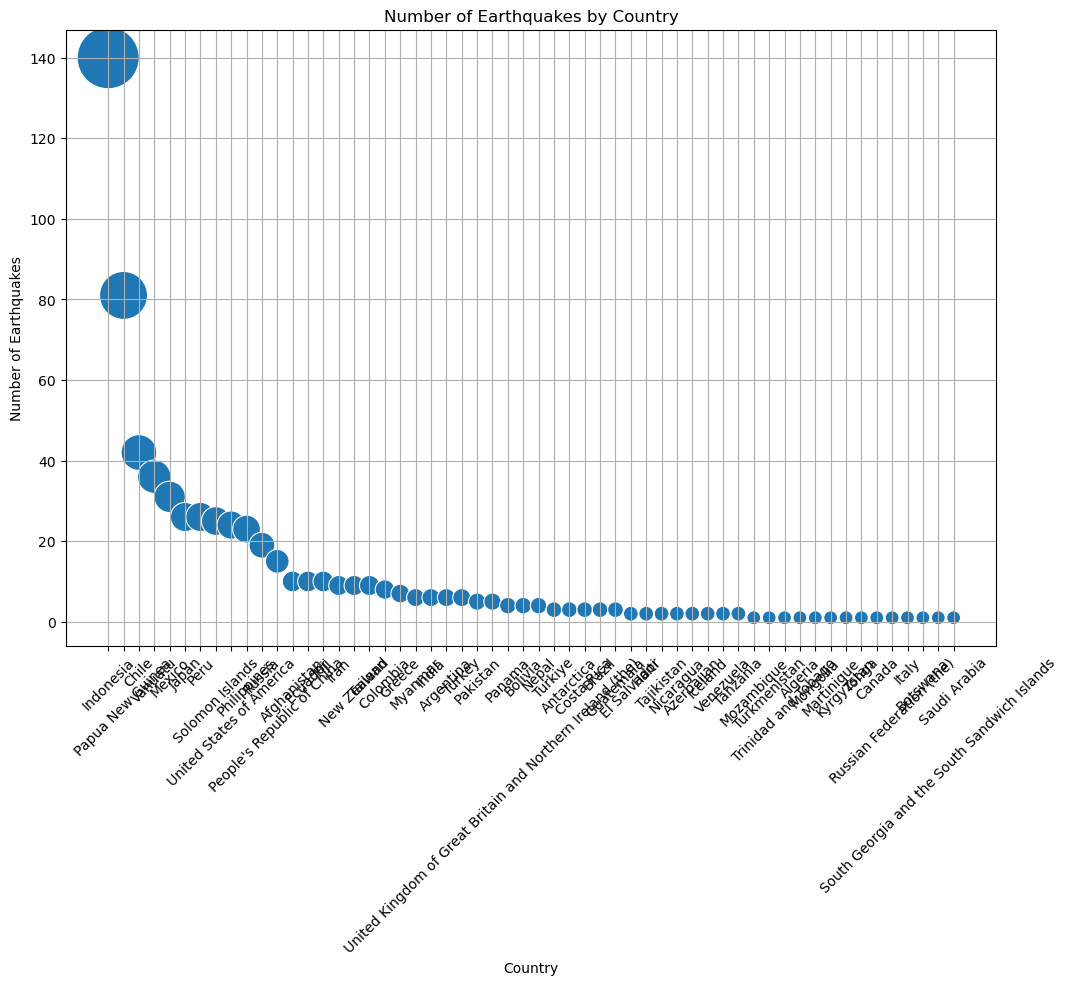

In [19]:
import seaborn as sns

# Prepare data for the bubble chart
bubble_data = df['country'].value_counts().reset_index()
bubble_data.columns = ['country', 'count']

# Create a bubble chart
plt.figure(figsize=(12, 8))
sns.scatterplot(data=bubble_data, x='country', y='count', size='count', legend=False, sizes=(100, 2000))
plt.title('Number of Earthquakes by Country')
plt.xlabel('Country')
plt.ylabel('Number of Earthquakes')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


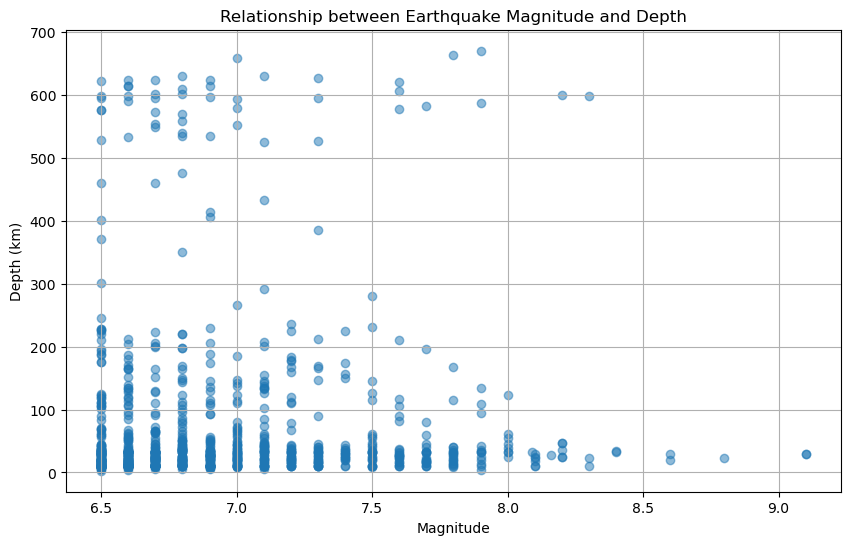

In [6]:
# Scatter plot of earthquake locations
plt.figure(figsize=(10, 6))
sns.scatterplot(x="longitude", y="latitude", hue="magnitude", size="magnitude", data=df)
plt.title("Geographic Distribution of Earthquakes")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


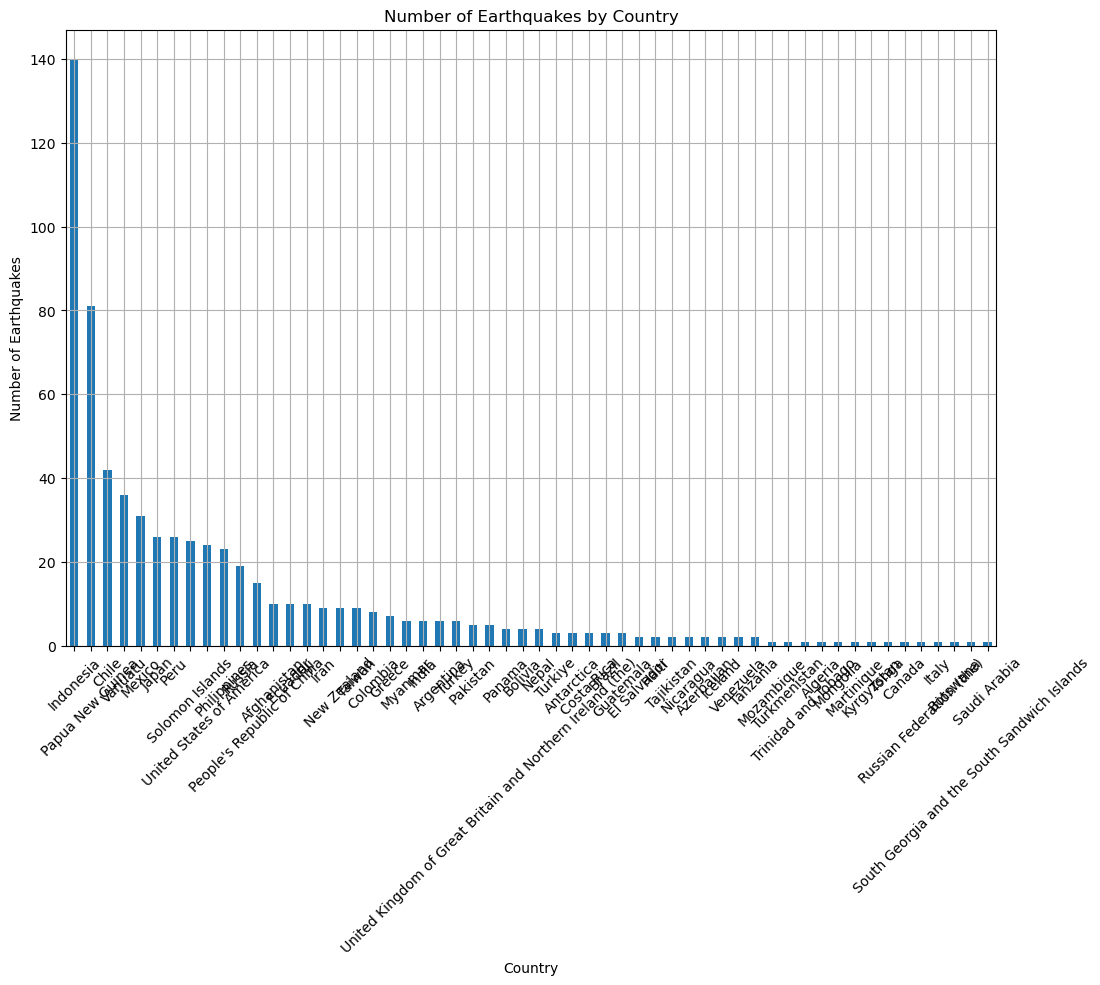

In [12]:
import matplotlib.pyplot as plt
# Count the number of earthquakes per country
earthquake_counts = df['country'].value_counts()

# Display the counts
earthquake_counts

# Create a bar plot of the earthquake counts by country
plt.figure(figsize=(12, 8))
earthquake_counts.plot(kind='bar')
plt.title('Number of Earthquakes by Country')
plt.xlabel('Country')
plt.ylabel('Number of Earthquakes')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


         magnitude                   date_time          cdi         mmi  \
count  1000.000000                        1000  1000.000000  1000.00000   
mean      6.940150  2010-06-19 03:02:36.720000     3.605000     6.02700   
min       6.500000         1995-05-05 03:53:00     0.000000     1.00000   
25%       6.600000         2003-08-17 04:18:15     0.000000     5.00000   
50%       6.800000         2011-06-29 20:26:30     4.000000     6.00000   
75%       7.100000         2017-02-22 08:58:45     7.000000     7.00000   
max       9.100000         2023-08-16 12:47:00     9.000000    10.00000   
std       0.438148                         NaN     3.328972     1.43399   

           tsunami          sig          nst         dmin          gap  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean      0.325000   847.915000   193.918000     1.125174    20.926290   
min       0.000000   650.000000     0.000000     0.000000     0.000000   
25%       0.000000   691.000

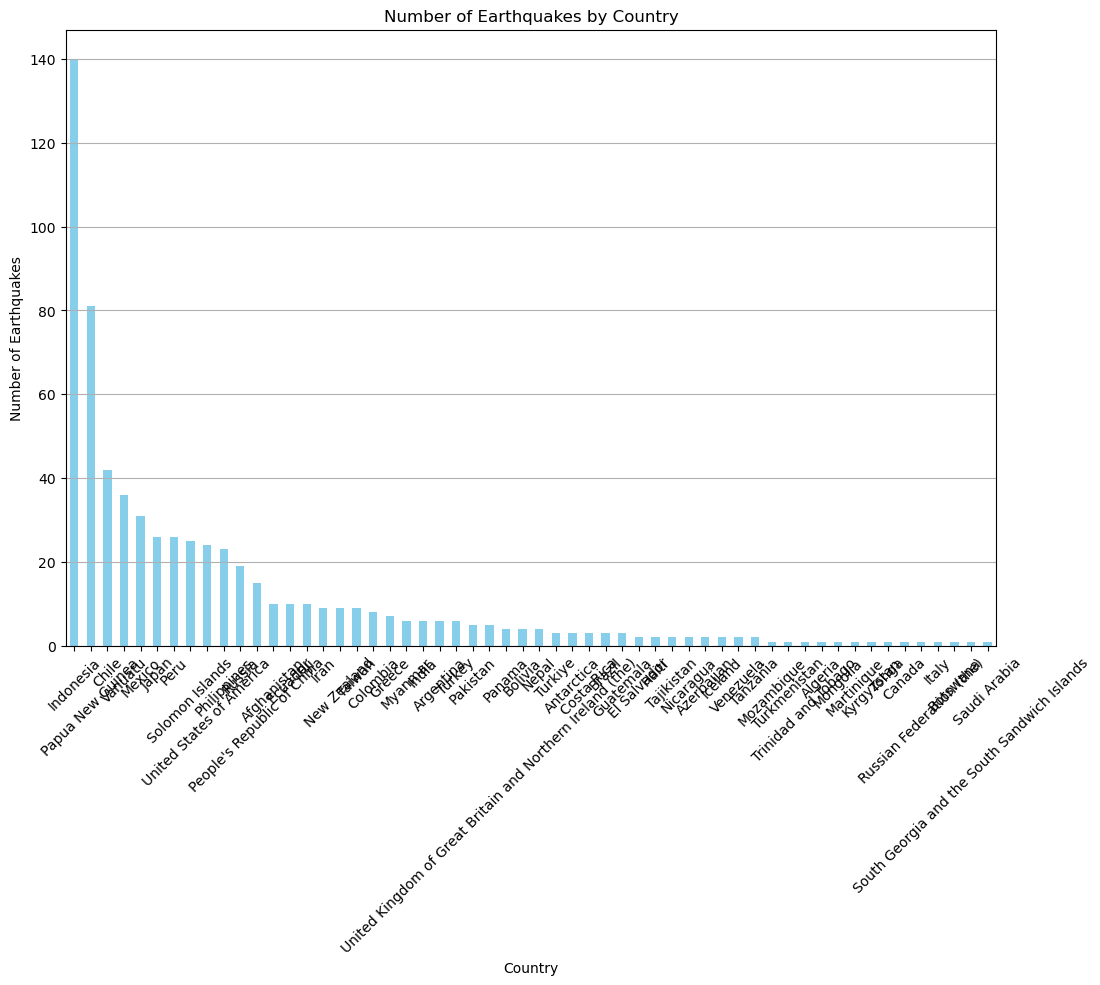

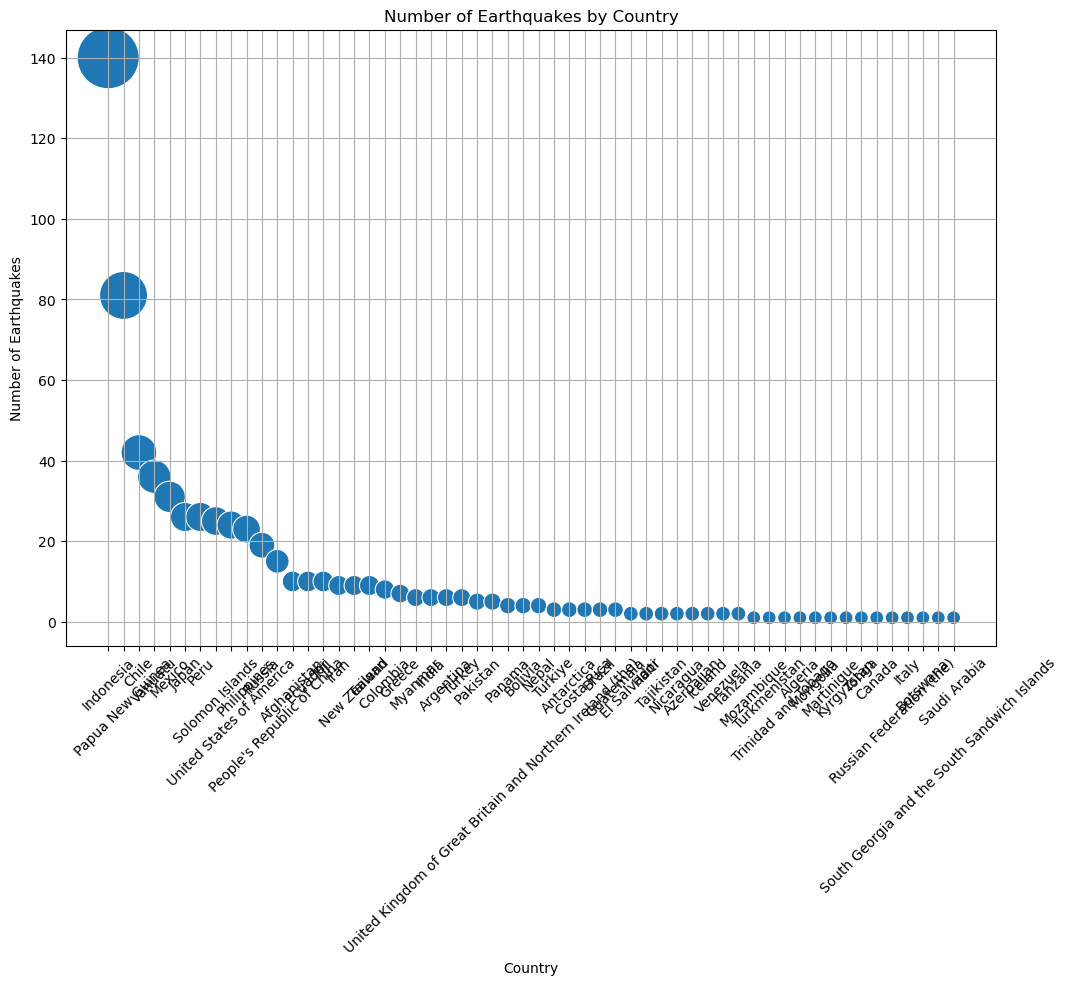

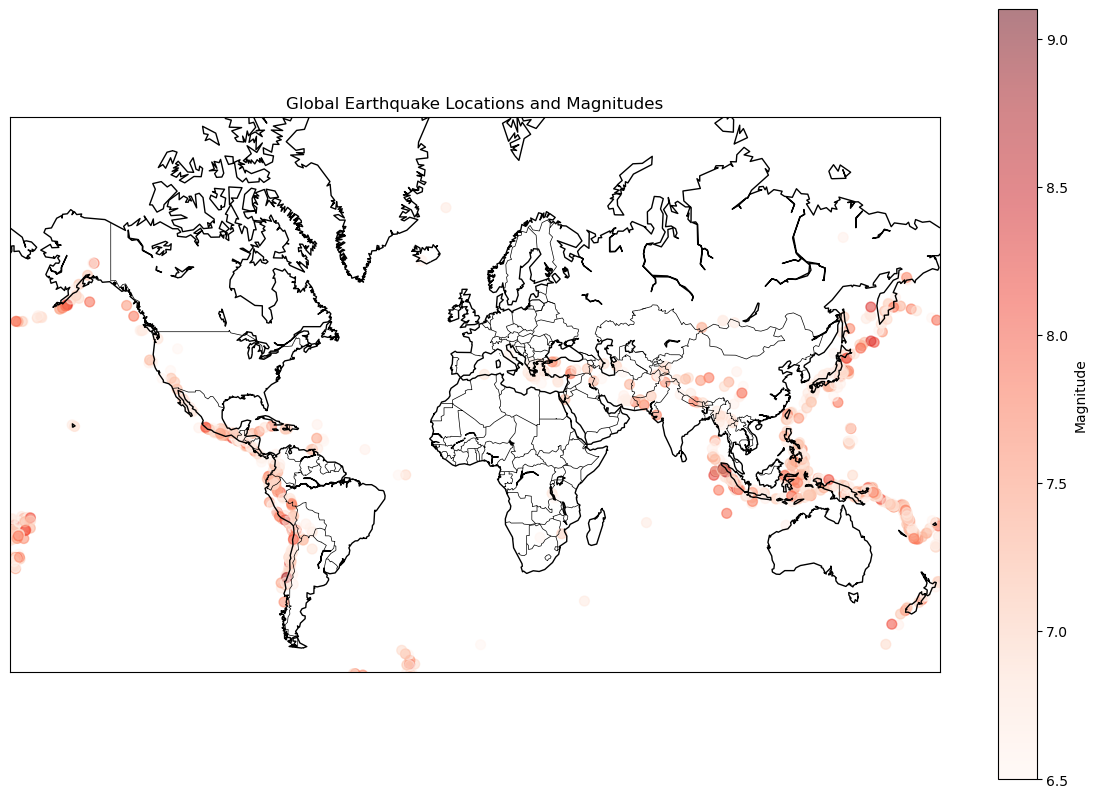

In [21]:

# 1. Descriptive Statistics
print(df.describe())

# 2. Pie Chart of Earthquake Proportions by Country

# Count the number of earthquakes by country
earthquake_counts = df['country'].value_counts()

# Create a bar chart of the earthquake counts by country
plt.figure(figsize=(12, 8))
earthquake_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Earthquakes by Country')
plt.xlabel('Country')
plt.ylabel('Number of Earthquakes')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


# 3. Bubble Chart of Earthquake Counts by Country

# Prepare data for the bubble chart
bubble_data = df['country'].value_counts().reset_index()
bubble_data.columns = ['country', 'count']

# Create a bubble chart
plt.figure(figsize=(12, 8))
sns.scatterplot(data=bubble_data, x='country', y='count', size='count', legend=False, sizes=(100, 2000))
plt.title('Number of Earthquakes by Country')
plt.xlabel('Country')
plt.ylabel('Number of Earthquakes')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


# 4. Heatmap of Global Earthquake Locations and Magnitudes
from mpl_toolkits.basemap import Basemap

# Create a figure and axis with a world map
plt.figure(figsize=(15, 10))
m = Basemap(projection='merc', 
            llcrnrlat=-60, urcrnrlat=80, 
            llcrnrlon=-180, urcrnrlon=180, 
            lat_ts=20, resolution='c')

m.drawcoastlines()
m.drawcountries()

# Convert latitude and longitude to map coordinates
x, y = m(df['longitude'].values, df['latitude'].values)

# Plot the earthquakes as points on the map
m.scatter(x, y, s=50, c=df['magnitude'], cmap='Reds', alpha=0.5)

plt.title('Global Earthquake Locations and Magnitudes')
plt.colorbar(label='Magnitude')
plt.show()




# INSIGHTS 

**1. Frequency of Earthquakes by Country**

 Countries like the United States (particularly Alaska), El Salvador, Argentina, and Fiji experience a higher frequency of significant earthquakes.
 *Implication*: These countries should prioritize earthquake preparedness programs, including public education, building codes, and emergency response planning.

**2. Magnitude Distribution**

The dataset includes earthquakes with magnitudes ranging from 6.5 to 7.3, indicating the occurrence of strong earthquakes.
*Implication*: Regions experiencing frequent high-magnitude earthquakes need to ensure that infrastructure can withstand such events. Regular drills and preparedness training are essential.

**3. Depth Distribution**

Earthquakes in the dataset have varying depths, with some being very shallow (e.g., 10 km) and others quite deep (e.g., 192.955 km).
*Implication*: Shallow earthquakes tend to cause more surface damage. Areas with a history of shallow earthquakes should focus on surface infrastructure resilience.

**4. Geographic Distribution**

Earthquakes are concentrated along tectonic plate boundaries, such as the Pacific Ring of Fire, which includes countries like the United States, El Salvador, Tonga, and Fiji.
*Implication*: Countries along tectonic plate boundaries should invest in advanced monitoring and early warning systems to mitigate the impact of earthquakes.

**5. Seismic Activity in Coastal Regions**

Several earthquakes are located in coastal regions (e.g., Vanuatu, El Salvador, Alaska), which poses a risk of tsunamis.
*Implication*: Coastal regions should have robust tsunami warning systems and evacuation plans in place. Public awareness campaigns about tsunami risks and safety measures are crucial.

**6. Correlation between Magnitude and Depth**

Analyzing the relationship between magnitude and depth can help in understanding the nature of seismic events. For instance, larger magnitudes at shallow depths could indicate more severe surface impacts.
*Implication*: Research into the correlation can inform building design standards and land use planning in earthquake-prone areas.

# RECOMMENDATIONS FOR DISASTER PREPAREDNESS
**1. Early Warning Systems**

Invest in and maintain early warning systems to detect earthquakes and tsunamis. These systems can provide critical time for people to evacuate and for automated systems to take protective actions.

**2. Building Codes and Infrastructure**

Implement and enforce strict building codes that require structures to withstand seismic forces. Retrofit existing buildings and infrastructure to improve their resilience.

**3. Public Education and Drills**

Conduct regular public education campaigns to raise awareness about earthquake safety measures. Organize community drills to practice evacuation and emergency response procedures.

**4. Research and Monitoring**

Support ongoing research into earthquake prediction and monitoring technologies. Enhance the network of seismographs and other monitoring tools to improve data collection and analysis.

**5. Emergency Response Planning**

Develop and regularly update emergency response plans. Ensure that emergency services are well-equipped and trained to respond to earthquake-related disasters.
